In [18]:
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
from pathlib import Path
path = Path('Data/')
Path('output').mkdir(parents=True, exist_ok=True)
output_path = 'output/mosaic_output.tif'

In [19]:
raster_files = list(path.iterdir())
raster_to_mosiac = []

In [20]:
for p in raster_files:
    raster = rio.open(p)
    raster_to_mosiac.append(raster)

In [21]:
mosaic, output = merge(raster_to_mosiac)

In [22]:
output_meta = raster.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
    })

In [23]:
with rio.open(output_path, "w", **output_meta) as m:
    m.write(mosaic)

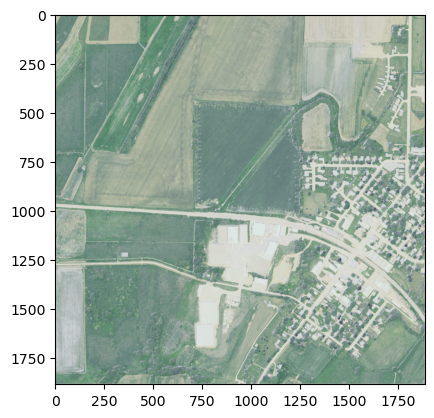

<Axes: >

In [24]:
# Use the show function to display the mosaicked image
show(mosaic)

The provided code is a Python script that mosaics or merges multiple raster images (typically in the GeoTIFF format) using the Rasterio library. Let's break down each part of the code:

1. Importing Libraries:
   ```python
   from rasterio.plot import show
   from rasterio.merge import merge
   import rasterio as rio
   from pathlib import Path
   ```
   - `rasterio` is a Python library for reading and writing geospatial raster data.
   - `rasterio.plot.show` is a function from `rasterio` used for displaying raster images.
   - `rasterio.merge.merge` is a function from `rasterio` used for merging multiple raster images.
   - `pathlib.Path` is a module for working with file and directory paths, and it's used to create a `Path` object to handle file paths.

2. Setting up Paths:
   ```python
   path = Path('Data/')
   Path('output').mkdir(parents=True, exist_ok=True)
   ```
   - `path` is set to the directory where the input raster images are located. The code assumes that these images are located in a folder named 'Data.'
   - `Path('output').mkdir(parents=True, exist_ok=True)` creates an 'output' directory if it doesn't exist. The `parents=True` parameter ensures that any necessary parent directories are created, and `exist_ok=True` ensures that the code doesn't throw an error if the directory already exists.

3. Defining the Output Path:
   ```python
   output_path = 'output/mosaic_output.tif'
   ```
   - `output_path` is set to the path where the mosaicked output will be saved. In this case, it's 'output/mosaic_output.tif.'

4. Creating Lists for Raster Files:
   ```python
   raster_files = list(path.iterdir())
   raster_to_mosaic = []
   ```
   - `raster_files` is a list of all files in the 'Data' directory using the `path.iterdir()` method.
   - `raster_to_mosaic` is an empty list that will be used to hold the opened raster files.

5. Looping through Raster Files and Opening Them:
   ```python
   for p in raster_files:
       raster = rio.open(p)
       raster_to_mosaic.append(raster)
   ```
   - A `for` loop iterates through each file in the `raster_files` list.
   - `rio.open(p)` opens each raster file using `rasterio` and appends it to the `raster_to_mosaic` list.

6. Merging the Raster Images:
   ```python
   mosaic, output = merge(raster_to_mosaic)
   ```
   - The `merge` function from `rasterio` is used to merge the raster images stored in the `raster_to_mosaic` list. The resulting mosaic is stored in the `mosaic` variable, and the output transformation is stored in the `output` variable.

7. Updating Metadata:
   ```python
   output_meta = raster.meta.copy()
   output_meta.update(
       {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
       })
   ```
   - The code copies the metadata from one of the input raster files (`raster.meta`) and updates it to match the dimensions and transformation of the mosaic.

8. Writing the Mosaicked Image:
   ```python
   with rio.open(output_path, "w", **output_meta) as m:
       m.write(mosaic)
   ```
   - Finally, the mosaicked image is written to the 'output/mosaic_output.tif' path using the updated metadata.

After running this script, you should have a mosaicked output image in the 'output' directory, and you can use the `rasterio.plot.show` function (as mentioned in a previous response) to display the mosaicked image.